In [1]:
import pandas as pd

data = pd.read_csv("../data/battery_data.csv")
data.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,3.486189,0.001417,5.990142,-0.0006,0.002,0.000
1,3.746592,1.489057,5.992528,1.4995,4.618,2.594
2,3.775438,1.490426,5.991340,1.4995,4.669,8.922
3,3.794844,1.491527,6.003554,1.4995,4.694,15.234
4,3.811691,1.491425,6.026729,1.4995,4.707,21.516


In [2]:
features = [
    'Voltage_measured',
    'Current_measured',
    'Temperature_measured',
    'Current_charge',
    'Voltage_charge'
]

X = data[features]


In [3]:
from sklearn.ensemble import IsolationForest

anomaly_model = IsolationForest(
    contamination=0.05,   # assume 5% abnormal
    random_state=42
)

data['anomaly'] = anomaly_model.fit_predict(X)


In [4]:
data['anomaly'].value_counts()


anomaly
 1    1540
-1      81
Name: count, dtype: int64

In [5]:
data['anomaly_label'] = data['anomaly'].map({
    1: 'Normal',
    -1: 'Anomaly'
})

data[['anomaly_label']].head()


,anomaly_label
0,Anomaly
1,Anomaly
2,Anomaly
3,Anomaly
4,Anomaly


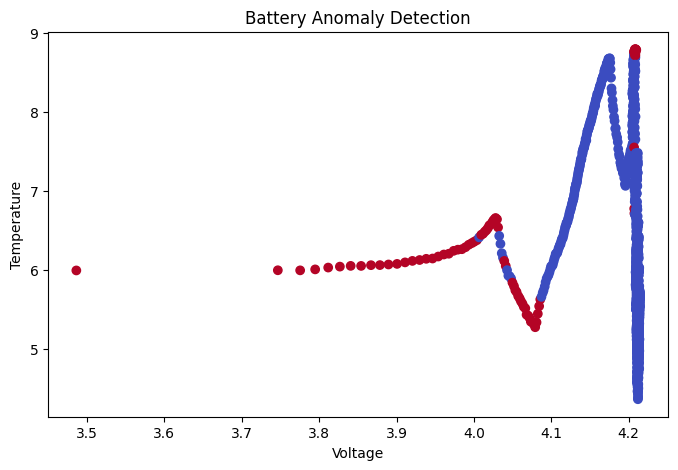

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(
    data['Voltage_measured'],
    data['Temperature_measured'],
    c=(data['anomaly'] == -1),
    cmap='coolwarm'
)
plt.xlabel("Voltage")
plt.ylabel("Temperature")
plt.title("Battery Anomaly Detection")
plt.show()


In [7]:
import joblib

joblib.dump(anomaly_model, "../models/anomaly_model.pkl")


['../models/anomaly_model.pkl']